# Generate and Visualize Data

In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [4]:
def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)
    x2 = ss.norm.rvs(h, sd1, n)
    y2 = ss.norm.rvs(0, sd2, n)
    return (x1, y1, x2, y2)

In [5]:
(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)

In [9]:
def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1, y1, "o", ms=2)
    plt.plot(x2, y2, "o", ms=2)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    plt.show()


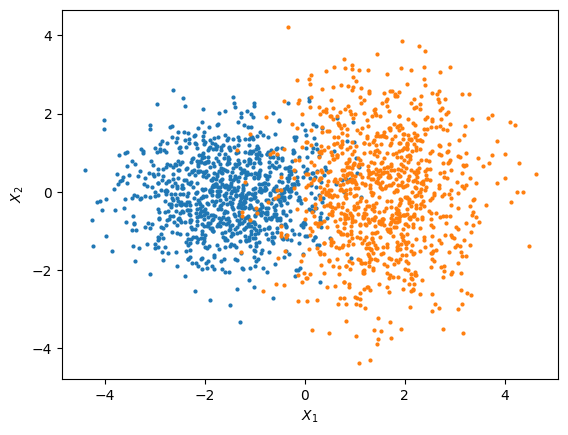

In [10]:
plot_data(x1, y1, x2, y2)

As we can see from the graph, the group of points on the left are the the observations comming from class one. The orange points on the right are comming from class 2.

Also the cloud on the right is broader than the blue one. That's beacuse we have used a greater value for its standard deviation.

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
clf = LogisticRegression()

In [7]:
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
X.shape 

(2000, 2)

In [8]:
n = 1000
y = np.hstack((np.repeat(1,n), np.repeat(2,n)))
y.shape

(2000,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

In [14]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.935

In [17]:
clf.predict(np.array([-2, 0]).reshape(1,-1))

array([1])

# Computing Predictive Probabilities Across the Grid

In [18]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[: ,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar (CS)
    plt.xlabel("$X_1$" )
    plt.ylabel("$X_2$")

Text(0.5, 1.0, 'Pred. prob for class 2')

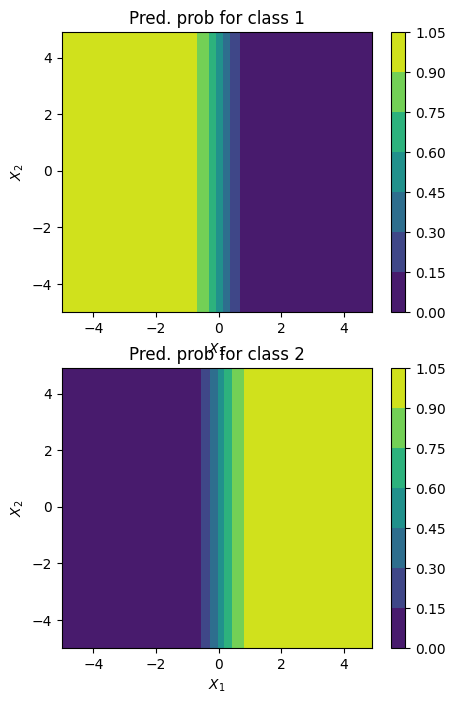

In [19]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2")